In [ ]:
# О_итог = 0.7 * дз + 0.3 * проверочные
import torch

In [ ]:
from torch import nn

In [ ]:
import numpy as np


In [ ]:
# np.array([[1,2,3,4]])
torch.tensor([[1,2,3,4]])

tensor([[1, 2, 3, 4]])

In [ ]:
a = torch.tensor([[1,2,3,4]])#.float()
b = torch.tensor([[1,2,3,4]])#.float()

# a @ b.t()

a.double().dtype

torch.float64

In [ ]:
a.shape

torch.Size([1, 4])

In [ ]:
a = a.float()
b = b.float()
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])

In [ ]:
torch.tanh(a)

tensor([[0.7616, 0.9640, 0.9951, 0.9993]])

In [ ]:
a.cuda() + b

RuntimeError: expected device cuda:0 but got device cpu

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
a.to(device)

tensor([[1., 2., 3., 4.]], device='cuda:0')

In [ ]:
! CUDA_VISIBLE_DEVICES=... python3 main.py ...

In [ ]:
a = torch.rand(3, 5)

a.view(5, 3).shape

torch.Size([5, 3])

In [ ]:
a_np = np.random.rand(3, 5)

# a_np.sum(axis=1)
a.sum(dim=1)

tensor([2.1911, 2.6922, 2.8226])

In [ ]:
a.max().shape

torch.Size([])

# ===========================

In [ ]:
a = torch.rand(3, 5)
a.requires_grad = True
b = torch.rand_like(a)

In [ ]:
res = torch.sum(2 * a + b)

In [ ]:
b.requires_grad

False

In [ ]:
from torch.autograd import grad

grad(res, a)

# ТАК НИКТО НЕ ДЕЛАЕТ!!!

(tensor([[2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.]]),)

In [ ]:
a = torch.rand(3, 5)
a.requires_grad = True
b = torch.rand_like(a)
res = torch.sum(a ** 2 + b)

In [ ]:
print(a.grad)

None


In [ ]:
res.backward()

In [ ]:
print(a.grad)
# Не None

tensor([[1.0386, 0.7273, 0.2383, 1.1436, 1.5613],
        [1.0395, 0.7869, 0.1879, 1.1351, 0.2739],
        [1.1067, 1.8565, 1.0047, 1.1059, 0.3418]])


In [ ]:
print(b.grad)
# Потому что requires_grad = False

None


In [ ]:
a = torch.rand(3, 5)
a.requires_grad = True
b = torch.rand_like(a)
b.requires_grad = True
res = torch.sum(a ** 2 + b)

In [ ]:
res.backward()

In [ ]:
print(b.grad)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
a = torch.rand(3, 5)
a.requires_grad = True
b = torch.rand_like(a)
b.requires_grad = True
res = torch.sum(a ** 2 + b, dim=1)

res.backward()
# Вызовет ошибку потому что res -- не тензор-скаляр

RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
a = torch.rand(3, 5)
a.requires_grad = True
b = torch.rand_like(a)
b.requires_grad = True
res1 = torch.sum(a ** 2 + b)
res2 = torch.sum(a + b)
res1.backward()
print(a.grad)
res2.backward()
print(a.grad)
# Градиенты от разных backward'ов суммируются

tensor([[0.3664, 0.3963, 0.4440, 0.5355, 0.7443],
        [0.0379, 1.6779, 0.0457, 1.7851, 0.2942],
        [1.8270, 1.8058, 1.7667, 0.1703, 0.9204]])
tensor([[1.3664, 1.3963, 1.4440, 1.5355, 1.7443],
        [1.0379, 2.6779, 1.0457, 2.7851, 1.2942],
        [2.8270, 2.8058, 2.7667, 1.1703, 1.9204]])


# ===============

In [ ]:
# class MyNetwork(nn.Module):
layer = nn.Linear(5, 120)

In [ ]:
a.shape

torch.Size([3, 5])

In [ ]:
layer(a).shape

torch.Size([3, 120])

In [ ]:
nn.ReLU()
nn.Softmax()
nn.Sigmoid()
...


Ellipsis

In [ ]:
torch.relu(a)

tensor([[0.1832, 0.1981, 0.2220, 0.2677, 0.3721],
        [0.0189, 0.8390, 0.0228, 0.8926, 0.1471],
        [0.9135, 0.9029, 0.8834, 0.0852, 0.4602]], grad_fn=<ReluBackward0>)

In [ ]:
simple_network = nn.Sequential(
    nn.Linear(5, 120),
    nn.ReLU(),
    nn.Linear(120, 120),
    nn.ReLU(),
)

In [ ]:
simple_network(a).shape

torch.Size([3, 240])

In [ ]:
class MyNetwork(nn.Module):
    def __init__(self, *args, **kwargs):
        super(MyNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 120),
            nn.ReLU(),
            nn.Linear(120, 120),
            nn.ReLU(),
        )
        self.net2 = nn.Sequential(
            nn.Linear(5, 120),
            nn.ReLU(),
            nn.Linear(120, 120),
            nn.ReLU(),
        )
        

    def forward(self, x):
        return self.net(x) + self.net2(x)


In [ ]:
# relu(x) = max(0, x)

In [ ]:
class MyNetwork(nn.Module):
    def __init__(self, *args, **kwargs):
        super(MyNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 120),
            nn.ReLU(),
            nn.Linear(120, 120),
            nn.ReLU(),
        )
        self.net2 = nn.Sequential(
            nn.Linear(5, 120),
            nn.ReLU(),
            nn.Linear(120, 120),
            nn.ReLU(),
        )
        

    def forward(self, x):
        return self.net(x) + self.net2(x)


In [ ]:
OrderedDict([
    ("linear1", nn.Linear(5, 120)),
    ("relu1", nn.ReLU()),
    ("linear2", nn.Linear(120, 120)),
    ("relu2", nn.ReLU())])

OrderedDict([('linear1', Linear(in_features=5, out_features=120, bias=True)),
             ('relu1', ReLU()),
             ('linear2', Linear(in_features=120, out_features=120, bias=True)),
             ('relu2', ReLU())])

In [ ]:
from collections import OrderedDict

network = nn.Sequential(
    OrderedDict([
    ("linear1", nn.Linear(5, 120)),
    ("relu1", nn.ReLU()),
    ("linear2", nn.Linear(120, 120)),
    ("relu2", nn.ReLU())])
)



In [ ]:
network.linear1.bias

Parameter containing:
tensor([ 0.2138, -0.2845, -0.2805,  0.1737,  0.2926, -0.1410, -0.2665, -0.0678,
         0.2077, -0.3188,  0.3166,  0.2051, -0.2892, -0.1978,  0.3302,  0.1572,
         0.3567,  0.1865,  0.0644, -0.1787,  0.3360,  0.1241, -0.1205,  0.0390,
         0.2918,  0.1208, -0.4313,  0.0209,  0.1856,  0.1950, -0.1485, -0.3020,
        -0.4166, -0.2791, -0.1374,  0.0092, -0.2525,  0.0530, -0.4292, -0.1949,
         0.3344, -0.3895, -0.2450, -0.0671, -0.2787,  0.3165, -0.1548, -0.0353,
        -0.0849,  0.3587,  0.0144, -0.2429,  0.3243,  0.0778,  0.1311,  0.3958,
         0.3736, -0.2255, -0.0383, -0.3281,  0.4166, -0.2308,  0.2349,  0.0384,
        -0.3481,  0.1185,  0.1877, -0.3284, -0.4185, -0.1121,  0.1396,  0.4469,
        -0.1359,  0.1708, -0.2195,  0.2097, -0.4250, -0.2390, -0.2251, -0.0630,
         0.1865,  0.1422, -0.2716,  0.2364,  0.0958,  0.4108, -0.2648,  0.1096,
        -0.4250,  0.2710, -0.4389,  0.0334,  0.1373, -0.0071, -0.0019,  0.1401,
        -0.2606,  

In [ ]:
# Загружать веса можно с диска
# network.state_dict()
# state_dict = torch.load(fname)
# network.load_state_dict()

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
Dataset
# абстрактный класс в котором есть методы __getitem__ и __len__
lis = [1,2,3]
lis[0] == lis.__getitem__(0)

True

In [ ]:
len(lis) == lis.__len__()

True

In [ ]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def preprocess(self, x):
        return x

    def __getitem__(self, idx):
        return {"x": self.preprocess(self.x[idx]), "y": self.y[idx]}

    def __len__(self,):
        return len(self.x)

In [ ]:
dataset = MyDataset(torch.rand(120, 5), torch.randint(0, 2, (120,)))

In [ ]:
dataset[0]

{'x': tensor([0.7863, 0.8376, 0.8148, 0.2392, 0.3573]), 'y': tensor(1)}

In [ ]:
dl = DataLoader(dataset, batch_size=12)

In [ ]:
for item in dl:
    print(item)

{'x': tensor([[0.7863, 0.8376, 0.8148, 0.2392, 0.3573],
        [0.8323, 0.8461, 0.0236, 0.2344, 0.3110],
        [0.7666, 0.3392, 0.7404, 0.0287, 0.8597],
        [0.2001, 0.0875, 0.0315, 0.6662, 0.3548],
        [0.2939, 0.3686, 0.6583, 0.2923, 0.1980],
        [0.3671, 0.5126, 0.8011, 0.2153, 0.0055],
        [0.1561, 0.1134, 0.5276, 0.4412, 0.9078],
        [0.0589, 0.5901, 0.0262, 0.0769, 0.5226],
        [0.4491, 0.0928, 0.4785, 0.0999, 0.2028],
        [0.7370, 0.3892, 0.0782, 0.3187, 0.3517],
        [0.4809, 0.5383, 0.2021, 0.3802, 0.6442],
        [0.3413, 0.4733, 0.6799, 0.3744, 0.4116]]), 'y': tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])}
{'x': tensor([[0.1597, 0.4480, 0.2654, 0.7138, 0.7055],
        [0.6687, 0.8004, 0.3314, 0.4152, 0.4291],
        [0.1271, 0.2182, 0.9989, 0.3848, 0.6651],
        [0.5474, 0.2973, 0.6526, 0.4703, 0.5582],
        [0.6746, 0.5628, 0.1429, 0.7084, 0.7119],
        [0.7276, 0.6448, 0.1078, 0.1436, 0.2769],
        [0.4623, 0.6334, 0.3228, 0.

In [ ]:
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [ ]:
import torchvision
dataset_train = MNIST("./mnist", download=True, train=True, 
                      transform=torchvision.transforms.ToTensor())
dataset_test = MNIST("./mnist", download=True, train=False,
                     transform=torchvision.transforms.ToTensor())

In [ ]:
network = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

train_dl = DataLoader(dataset_train, batch_size=128)
test_dl = DataLoader(dataset_test, batch_size=128)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=1e-1)

for epoch in range(10):

    for idx, (images, labels) in enumerate(train_dl):
        preds = network(images)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if idx % 50 == 0:
            print(loss.item())


    cumulative_loss = 0
    acc = 0

    with torch.no_grad():
        for idx, (images, labels) in enumerate(test_dl): 
            preds = network(images)
            loss = criterion(preds, labels)
            cumulative_loss += loss.item()
            acc += (preds.argmax(1) == labels).float().mean()
    print(cumulative_loss / idx, acc / idx)
    #if idx % 50 == 0:
    #    print(loss.item())

2.324509382247925
1.833387851715088
0.8033930659294128
0.5727453231811523
0.37661415338516235
0.4378845989704132
0.37872111797332764
0.4406692683696747
0.43145155906677246
0.4559275507926941
0.3372312132269144 tensor(0.9091)
0.24504129588603973
0.27750569581985474
0.20284505188465118
0.2775854766368866
0.20138587057590485
0.2797655761241913
0.2510136365890503
0.3204866945743561
0.27840346097946167
0.3170830011367798
0.23825159225947198 tensor(0.9391)
0.153513103723526
0.19755102694034576
0.13508474826812744
0.20898553729057312
0.15430328249931335
0.20291830599308014
0.1978721171617508
0.25713273882865906
0.22168269753456116
0.23605255782604218
0.1873925607651472 tensor(0.9545)
0.1166420429944992
0.16152657568454742
0.10666035115718842
0.17788277566432953
0.12416583299636841
0.16503289341926575
0.1631646603345871
0.21460697054862976
0.1939205676317215
0.1822759062051773
0.15531528492768606 tensor(0.9642)
0.09732671082019806
0.1393555849790573
0.09031619876623154
0.159383162856102
0.1023

In [ ]:
# сохраним веса нейросети
torch.save(network.state_dict(), "./network_state_dict.pt")

## Seminar 02 -- conv2d & stuff starts here.

In [ ]:
from torchvision.datasets import CIFAR10

In [ ]:
from torchvision import transforms as T
import torch
import numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
from torchvision import transforms as T
import torch
import numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
from tqdm import tqdm_notebook
import time

progress_bar = tqdm_notebook(range(100))

for item in progress_bar:
    time.sleep(0.5)
    progress_bar.set_description("Step = {}".format(item))
    progress_bar.set_postfix(item=item)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
from tqdm import tqdm_notebook

def train(model, train_dataloader, eval_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, schedulder=None):
    for epoch in range(n_epochs):
        train_one_epoch(model, train_dataloader, criterion, optimizer, device)
        loss = evaluate(model, eval_dataloader, criterion, device)
        if schedulder is not None:
            scheduler.step(loss)
    
    
def train_one_epoch(model, train_dataloader, criterion, optimizer, device):
    progress_bar = tqdm_notebook(train_dataloader)
    model = model.to(device).train()
    idx = 0
    for (images, labels) in progress_bar:
        images, labels = images.to(device), labels.to(device)
        preds = model(images)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if idx % 10 == 0:
            progress_bar.set_description("Loss = {:.4f}".format(loss.item()))
        idx += 1
        
def evaluate(model, eval_dataloader, criterion, device="cuda:0"):
    cumulative_loss = 0
    acc = 0
    model = model.to(device).eval()
    with torch.no_grad():
        for idx, (images, labels) in enumerate(eval_dataloader): 
            images, labels = images.to(device), labels.to(device)
            preds = model(images)
            loss = criterion(preds, labels)
            cumulative_loss += loss.item()
            acc += (preds.argmax(1) == labels).float().mean()
    print("Loss = {:.4f}".format(cumulative_loss / (idx + 1)), "accuracy = {:.4f}".format(acc / (idx + 1)))
    return cumulative_loss

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 16, (3, 3)),
            nn.MaxPool2d((2, 2)),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(16, 32, (3, 3)),
            nn.MaxPool2d((2, 2)),
            nn.ReLU(),
            nn.BatchNorm2d(32),
        )
        
        self.block3 = nn.Sequential(
            nn.Conv2d(32, 64, (3, 3)),
            nn.MaxPool2d((2, 2)),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 256),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(256, 10),
        )
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        return self.classifier(x)
    



In [ ]:
dataset_train = CIFAR10("./", download=True, transform=T.Compose([
    T.RandomApply([
        T.RandomHorizontalFlip(0.25),
        T.ColorJitter(brightness=.3, hue=.2),
        T.RandomCrop((24, 24)),
        T.Resize((32, 32)),
        T.RandomVerticalFlip(0.25),
    ], p=0.6),
    T.ToTensor(),
    T.Normalize([0.4914, 0.4821, 0.4465], [0.2457, 0.2422, 0.2598]),
]))

dataset_test = CIFAR10("./", download=True, train=False, transform=T.Compose([
    T.ToTensor(),
    T.Normalize([0.4914, 0.4821, 0.4465], [0.2457, 0.2422, 0.2598])
]))

train_dataloader = DataLoader(dataset_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=32, shuffle=True)
device = "cuda:0" if torch.cuda.is_available() else "cpu"

from torchvision.models import resnet18

model = resnet18(pretrained=True)
model.fc = nn.Linear(512, 10)

optimizer = torch.optim.Adam(model.parameters(), 1e-3)
schedulder = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=2)

criterion = nn.CrossEntropyLoss()

train(model, train_dataloader, test_dataloader, criterion, optimizer, schedulder=schedulder)

Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

KeyboardInterrupt: ignored

## Seminar 03 -- transfer learning, FGSM adv attacks and style transfer starts here

In [ ]:
! wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip && unzip kagglecatsanddogs_3367a.zip > /dev/null 

--2021-10-25 06:35:02--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.38.180.110, 2600:1407:3c00:108c::e59, 2600:1407:3c00:10a2::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.38.180.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip.1’

kagglecatsanddogs_3 100%[===================>] 786.68M   105MB/s    in 7.6s    

2021-10-25 06:35:10 (104 MB/s) - ‘kagglecatsanddogs_3367a.zip.1’ saved [824894548/824894548]

replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! rm -rf PetImages/Cat/666.jpg PetImages/Dog/11702.jpg

In [ ]:
from PIL import Image
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

dataset = ImageFolder("PetImages", transform=T.Compose([
            T.Resize((224, 224)),
            T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
            T.ToTensor(),
            T.Normalize([0.4914, 0.4821, 0.4465], [0.2457, 0.2422, 0.2598]),]))

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))])
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [ ]:
from torchvision.models import resnet18

In [ ]:
model = resnet18(pretrained=True)

model.fc = nn.Linear(512, 2)

for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters(), 1e-3)
criterion = nn.CrossEntropyLoss()
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# schedulder = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=2)

In [ ]:
train(model, train_dataloader, test_dataloader, criterion, optimizer, device=device)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/625 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Loss = 0.1065 accuracy = 0.9620


  0%|          | 0/625 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
for param in model.parameters():
    param.requires_grad = True

for param in model.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model.parameters(), 4e-5)
criterion = nn.CrossEntropyLoss()
device = "cuda:0" if torch.cuda.is_available() else "cpu"

train(model, train_dataloader, test_dataloader, criterion, optimizer, device=device)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/625 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Loss = 0.0381 accuracy = 0.9932


  0%|          | 0/625 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
with open("weights.pth", "wb") as f:
    torch.save(model.state_dict(), f)

tensor([[1.0000e+00, 4.4486e-07]], device='cuda:0', grad_fn=<SoftmaxBackward>)

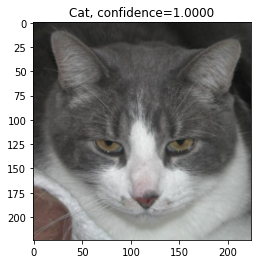

In [ ]:
from matplotlib import pyplot as plt

model.eval()

def imshow(image, label=0, confidence=0):
    mean = torch.tensor([0.4914, 0.4821, 0.4465])[:, None, None]
    std = torch.tensor([0.2457, 0.2422, 0.2598])[:, None, None]
    image = image * std + mean
    if label == 0:
        plt.title("Cat, confidence={:.4f}".format(confidence))
    else:
        plt.title("Dog, confidence={:.4f}".format(confidence))
    plt.imshow(image.cpu().detach().numpy().transpose((1, 2, 0)))

i = np.random.randint(0, len(val_dataset))
image = val_dataset[i][0]
pred = torch.softmax(model(image[None].to(device)), dim=1)
imshow(image, label=pred.argmax(1), confidence=pred.max(1).values.item())

pred

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


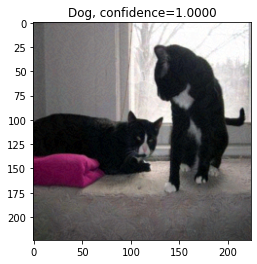

In [ ]:
from torch.autograd import grad
model.eval()

def fgsm_attack(image, image_grad, eps=5e-2):
    return image + eps * torch.sign(image_grad)

i = np.random.randint(0, len(val_dataset))
image = val_dataset[i][0]
image.requires_grad = True

logits = model(image[None].to(device))
loss = criterion(logits, torch.tensor(val_dataset[i][1]).to(device).view(1))
loss.backward()


image = fgsm_attack(image, image.grad)
logits = model(image[None].to(device))
pred = torch.softmax(logits, dim=1)
imshow(image, label=pred.argmax(1), confidence=pred.max(1).values.item())


torch.Size([3, 32, 32])